In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('winequality-red.csv')
print(df.head())
print(df.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

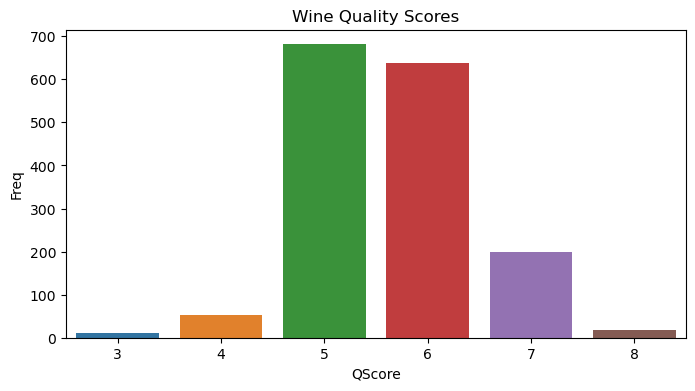

In [3]:
plt.figure(figsize=(8, 4))
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Scores')
plt.xlabel('QScore')
plt.ylabel('Freq')
plt.show()

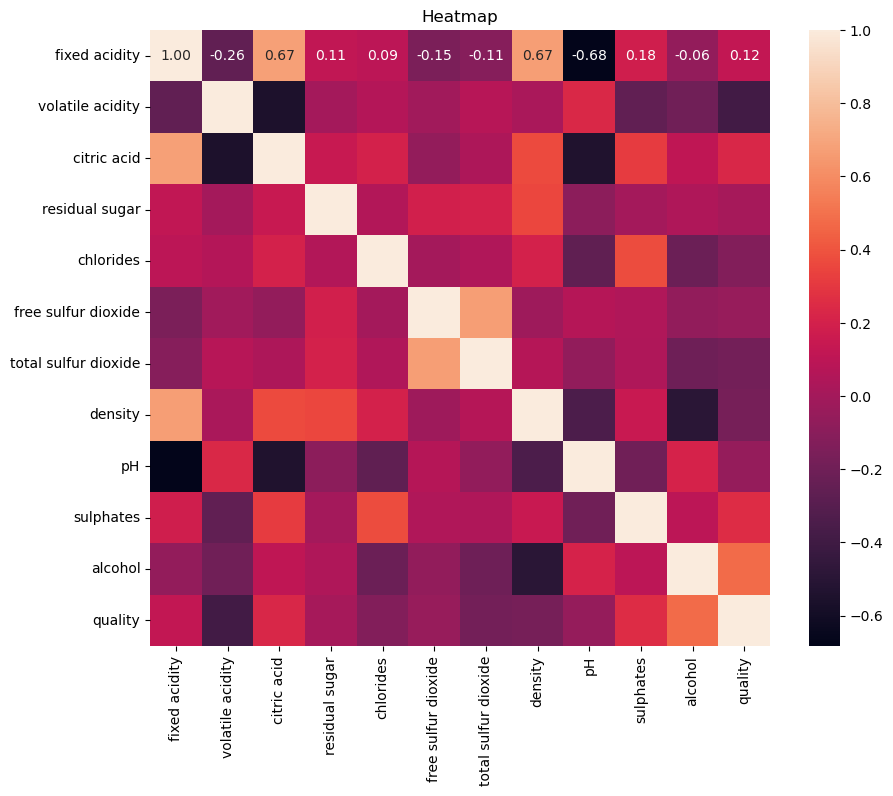

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Heatmap')
plt.show()

In [5]:
df['quality'] = (df['quality'] >= 7).astype(int)

X = df.drop('quality', axis=1)
y = df['quality']


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search1 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='roc_auc')

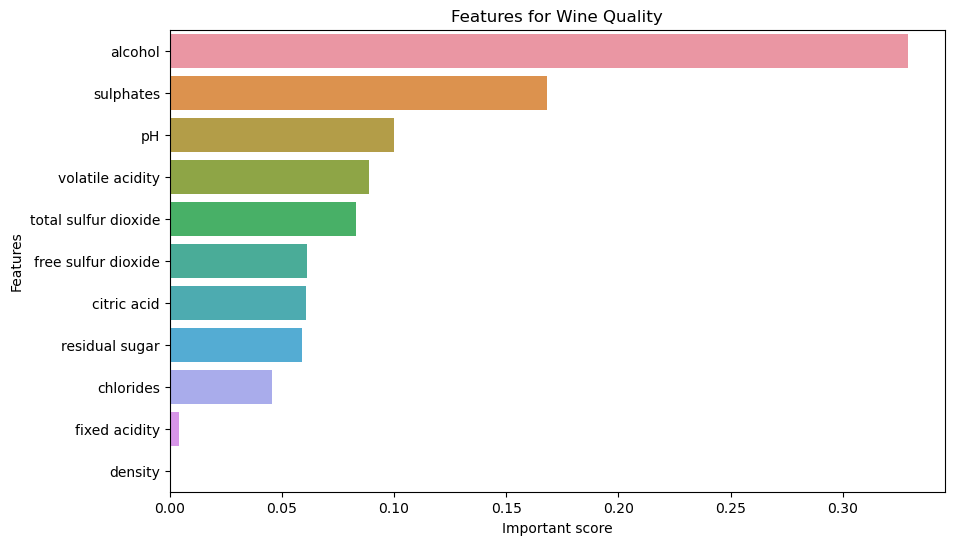

In [9]:
best_model = grid_search1.best_estimator_
important_features = best_model.feature_importances_
df1 = pd.DataFrame({'Feature': X.columns, 'Importance': important_features})
df1 = df1.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df1)
plt.title('Features for Wine Quality')
plt.xlabel('Important score')
plt.ylabel('Features')
plt.show()

which physiochemical properties make a wine 'good'!- Below are the inferences-
Appropriate Alcohol Level: A wine's body and flavor profile are enhanced by a balanced alcohol percentage.
sulphates: Although essential for halting oxidation and preserving freshness, their proportionality is vital to avoid overpowering the wine's inherent characteristics.
Wines with a pH that is too high or too low may taste too sour or flat. A pH that is balanced has an impact on the stability and color of the wine.
Low Volatile Acidity: As too much can provide an unpleasant vinegar flavor, lower levels frequently signify superior quality.